# Movie Recommendation System

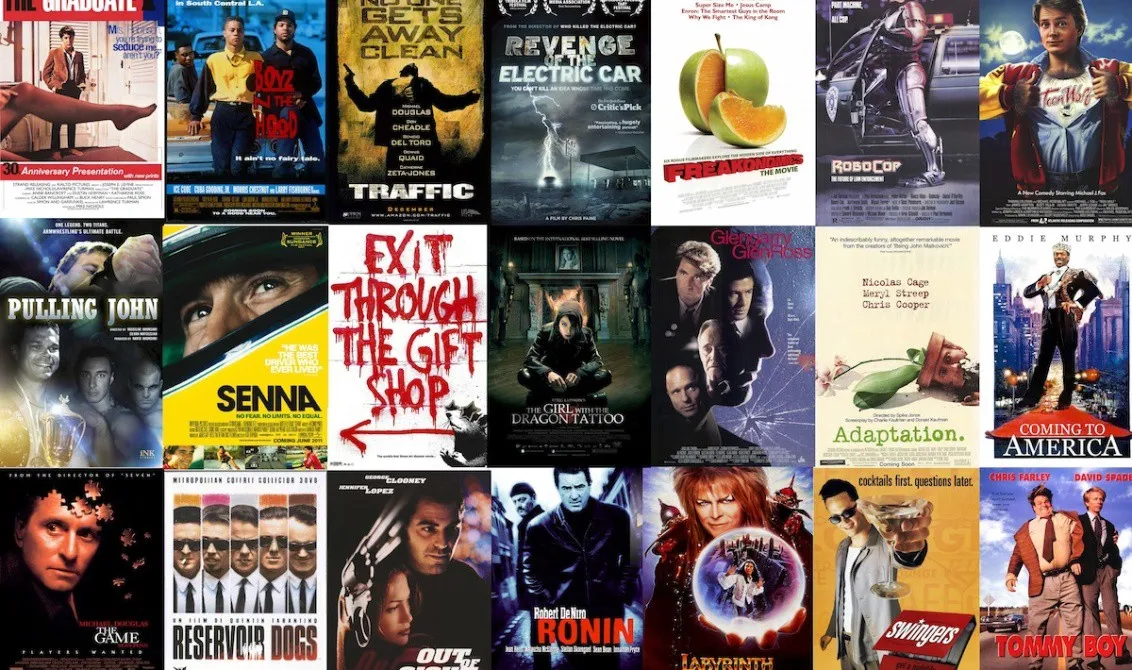

# About Dataset

The project is content based movie recommendation system. The data is taken from Kaggle TMDB movies. The dataset consist of metadata of movies like Genres, Overview, Production houses, Director, Actors, revenue etc.

Content based recommendation uses metadata attributes such as genre, director, description, actors, etc. for movies, to make suggestions for the users. It uses all the metadata to understand user preferences and recommend similar movies.

In [4]:
# Basic library
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
import sklearn
import datetime

In [88]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [149]:
# upload the dataset
movies_full = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [150]:
movies_full.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [131]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [151]:
movies_full.shape

(4803, 20)

In [133]:
credits.shape

(4803, 4)

In [152]:
movies_full = movies_full.merge(credits, on='title')

In [153]:
movies_full.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'movie_id', 'cast', 'crew'], dtype='object')

In [154]:
movies_full.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [137]:
# movie_id, genres ,keywords,title,overview, cast, crew

In [155]:
movies_full['original_language'].value_counts()/len(movies)*100

en    93.782491
fr     1.455604
es     0.665419
zh     0.561447
de     0.561447
hi     0.395093
ja     0.332710
it     0.291121
ko     0.249532
cn     0.249532
ru     0.228738
pt     0.187149
da     0.145560
sv     0.103972
nl     0.083177
fa     0.083177
th     0.062383
he     0.062383
ta     0.041589
cs     0.041589
ro     0.041589
id     0.041589
ar     0.041589
vi     0.020794
sl     0.020794
ps     0.020794
no     0.020794
ky     0.020794
hu     0.020794
pl     0.020794
af     0.020794
nb     0.020794
tr     0.020794
is     0.020794
xx     0.020794
te     0.020794
el     0.020794
Name: original_language, dtype: float64

In [156]:
movies_full.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [157]:
movies = movies_full[['movie_id', 'genres' ,'keywords','title','overview', 'cast', 'crew','original_language']]

# Missing value Treatment

In [158]:
movies.isnull().sum()

movie_id             0
genres               0
keywords             0
title                0
overview             3
cast                 0
crew                 0
original_language    0
dtype: int64

In [159]:
# missing values
def missing_value_check(movies):
    print('Is there any missing value present or not?',movies.isnull().values.any())
    missing_percentage = movies.isnull().sum()*100/len(movies)
    missing_value_df = pd.DataFrame({'missing_count': movies.isnull().sum(),'missing_percentage': missing_percentage})
    return missing_value_df[missing_value_df.missing_count != 0]
    
missing_value_check(movies)

Is there any missing value present or not? True


,missing_count,missing_percentage
overview,3,0.062383


In [160]:
movies[movies.overview.isnull()]

,movie_id,genres,keywords,title,overview,cast,crew,original_language
2662,370980,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",Chiamatemi Francesco - Il Papa della gente,NaN,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",it
4147,459488,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","To Be Frank, Sinatra at 100",NaN,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",en
4437,292539,"[{""id"": 99, ""name"": ""Documentary""}]",[],Food Chains,NaN,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de...",de


In [161]:
movies.overview=movies.overview.fillna('[]')

In [162]:
movies[movies.overview.isnull()]

,movie_id,genres,keywords,title,overview,cast,crew,original_language


__Observations:__
* from the info() , we can see there are 3 missing values in Overview column. We will fill them with []  


In [163]:
from textblob import TextBlob, Word, Blobber
from textblob.wordnet import VERB
from textblob.taggers import NLTKTagger

In [167]:
for i in ( range(0, len(movies))):
    text=movies['overview'][i]
    text= TextBlob('due curs former master profion , damodar surviv death ridley freeborn undead entiti pursuit evil artifact hundr year , might capabl unleash unstopp destruct izmir descend caus demis . action adventur fantasi fighter royalti curs dragon brucepayn markdymond clemencyburton-hil gerryl')
    text=text.translate(from_lang=movies.original_language[i], to='en') # translate 

NotTranslated: Translation API returned the input string unchanged.

# Data Preprocessing

## Missing Value Treatment

In [170]:
movies.isnull().sum()

movie_id             0
genres               0
keywords             0
title                0
overview             0
cast                 0
crew                 0
original_language    0
dtype: int64

In [171]:
movies.dropna(inplace=True)

In [172]:
movies.isnull().sum()

movie_id             0
genres               0
keywords             0
title                0
overview             0
cast                 0
crew                 0
original_language    0
dtype: int64

__Observation__:
    There were 3 missing values in Overview Column. As the missing values are less , we dropped them

# Duplicate Check

In [173]:
movies.duplicated().sum()

0

__Observation__:
    No Duplicate entries are found

# Feature Engineering

In [174]:
movies.iloc[1500].genres

'[{"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}, {"id": 14, "name": "Fantasy"}]'

In [175]:
import ast

In [176]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [177]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew,original_language
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en
1,285,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en
2,206647,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en
3,49026,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en
4,49529,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en


In [178]:
movies['keywords'] = movies['keywords'].apply(convert)

In [179]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew,original_language
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en


In [180]:
movies['cast']

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4804    [{"cast_id": 1, "character": "El Mariachi", "c...
4805    [{"cast_id": 1, "character": "Buzzy", "credit_...
4806    [{"cast_id": 8, "character": "Oliver O\u2019To...
4807    [{"cast_id": 3, "character": "Sam", "credit_id...
4808    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4809, dtype: object

In [181]:
def convert1(text):
    L = []
    counter =0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter +=1        
    return L

In [182]:
movies['cast'] = movies['cast'].apply(convert1)

In [183]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew,original_language
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en


In [184]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] =='Director':
            L.append(i['name'])
            
    return L

In [185]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [186]:
movies.head(20)

,movie_id,genres,keywords,title,overview,cast,crew,original_language
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],en
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],en
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],en
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],en
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],en
5,559,"[Fantasy, Action, Adventure]","[dual identity, amnesia, sandstorm, love of on...",Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,"[Tobey Maguire, Kirsten Dunst, James Franco]",[Sam Raimi],en
6,38757,"[Animation, Family]","[hostage, magic, horse, fairy tale, musical, p...",Tangled,When the kingdom's most wanted-and most charmi...,"[Zachary Levi, Mandy Moore, Donna Murphy]","[Byron Howard, Nathan Greno]",en
7,99861,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero, based on com...",Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],en
8,767,"[Adventure, Fantasy, Family]","[witch, magic, broom, school of witchcraft, wi...",Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...","[Daniel Radcliffe, Rupert Grint, Emma Watson]",[David Yates],en
9,209112,"[Action, Adventure, Fantasy]","[dc comics, vigilante, superhero, based on com...",Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,"[Ben Affleck, Henry Cavill, Gal Gadot]",[Zack Snyder],en


In [187]:
# Movie_id, title, tags(genres	keywords , overview, 	cast	crew)

In [188]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [189]:
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)

In [190]:
movies.head()

,movie_id,genres,keywords,title,overview,cast,crew,original_language
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],en
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],en
2,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,A cryptic message from Bond’s past sends him o...,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],en
3,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],en
4,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"John Carter is a war-weary, former military ca...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],en


In [191]:
movies['overview'] = movies['overview'].apply(lambda x : x.split())

In [192]:
movies['overview'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [195]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] +   movies['crew']

In [196]:
movies.shape

(4809, 9)

In [197]:
movies.columns

Index(['movie_id', 'genres', 'keywords', 'title', 'overview', 'cast', 'crew', 'original_language', 'tags'], dtype='object')

In [198]:
final_df = movies.drop(columns = ['overview','genres', 'keywords','cast','crew','original_language'])

In [199]:
final_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [200]:
final_df['tags'] = final_df['tags'].apply(lambda x : " ".join(x))
final_df.head(10)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
5,559,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...
6,38757,Tangled,When the kingdom's most wanted-and most charmi...
7,99861,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...
8,767,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he..."
9,209112,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...


# Text Preprocessing



Some of the common text preprocessing / cleaning steps are:

* Tokenization
* Casefolding
* Removal of Punctuations
* Removal of Stopwords
* Removal of Frequent words
* Removal of Rare words
* Number to words/ignoring numbers
* Normaliation using Stemming or Lemmatization 
* Removal/Conversion of emojis and emoticons
* Removal of URLs
* Removal of HTML tags
* Chat words conversion
* Spelling correction

We will be using Casefolding, Tokenization, Stopwords,Punctuation,Numbers removal 

In [201]:
final_df.tags[2661]

'Due to a curse from his former master Profion, Damodar survived his death by Ridley Freeborn as an undead entity in pursuit of an evil artifact for some hundred years, so that he might be capable of unleashing unstoppable destruction on Izmir and the descendants of those who caused his demise. Action Adventure Fantasy fighter royalty curse dragon BrucePayne MarkDymond ClemencyBurton-Hill GerryLively'

In [203]:
nltk.pos_tag(word_tokenize(final_df.tags[2661]))

[('Due', 'JJ'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('curse', 'NN'),
 ('from', 'IN'),
 ('his', 'PRP$'),
 ('former', 'JJ'),
 ('master', 'NN'),
 ('Profion', 'NNP'),
 (',', ','),
 ('Damodar', 'NNP'),
 ('survived', 'VBD'),
 ('his', 'PRP$'),
 ('death', 'NN'),
 ('by', 'IN'),
 ('Ridley', 'NNP'),
 ('Freeborn', 'NNP'),
 ('as', 'IN'),
 ('an', 'DT'),
 ('undead', 'JJ'),
 ('entity', 'NN'),
 ('in', 'IN'),
 ('pursuit', 'NN'),
 ('of', 'IN'),
 ('an', 'DT'),
 ('evil', 'JJ'),
 ('artifact', 'NN'),
 ('for', 'IN'),
 ('some', 'DT'),
 ('hundred', 'CD'),
 ('years', 'NNS'),
 (',', ','),
 ('so', 'RB'),
 ('that', 'IN'),
 ('he', 'PRP'),
 ('might', 'MD'),
 ('be', 'VB'),
 ('capable', 'JJ'),
 ('of', 'IN'),
 ('unleashing', 'VBG'),
 ('unstoppable', 'JJ'),
 ('destruction', 'NN'),
 ('on', 'IN'),
 ('Izmir', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('descendants', 'NNS'),
 ('of', 'IN'),
 ('those', 'DT'),
 ('who', 'WP'),
 ('caused', 'VBD'),
 ('his', 'PRP$'),
 ('demise', 'NN'),
 ('.', '.'),
 ('Action', 'NNP'),
 ('Adventure', 'NNP'

In [204]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize, WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud ,STOPWORDS 
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import wordnet


In [205]:
lem=WordNetLemmatizer()
stopwords_list=stopwords.words('english')
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
corpus=[]
for i in range(0, len(final_df)):
    text=final_df['tags'][i]
    text=text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters 
    pos_tagged_text = nltk.pos_tag(word_tokenize(text))
    lemmed_words=[lem.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text if word not in stopwords_list]
    text=' '.join(lemmed_words)
    corpus.append(text) 

In [206]:
corpus[:10]

['nd century paraplegic marine dispatch moon pandora unique mission become torn follow order protect alien civilization action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul samworthington zoesaldana sigourneyweaver jamescameron',
 'captain barbossa long believe dead come back life head edge earth turner elizabeth swann nothing quite seem adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski',
 'cryptic message bond past sends trail uncover sinister organization battle political force keep secret service alive bond peel back layer deceit reveal terrible truth behind spectre action adventure crime spy basedonnovel secretag

In [207]:
final_df['tags_cleaned']= corpus

In [208]:
final_df.head()

,movie_id,title,tags,tags_cleaned
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",nd century paraplegic marine dispatch moon pan...
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",captain barbossa long believe dead come back l...
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,cryptic message bond past sends trail uncover ...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,follow death district attorney harvey dent bat...
4,49529,John Carter,"John Carter is a war-weary, former military ca...",john carter war weary former military captain ...


In [210]:
final_df.tags_cleaned[2661]

'due curse former master profion damodar survive death ridley freeborn undead entity pursuit evil artifact hundred year might capable unleash unstoppable destruction izmir descendant cause demise action adventure fantasy fighter royalty curse dragon brucepayne markdymond clemencyburton hill gerrylively'

# Text Vectorization

## Bag Of Words (BOW)

In [211]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [212]:
vector = cv.fit_transform(final_df['tags_cleaned']).toarray()

In [213]:
vector.shape

(4809, 5000)

In [214]:
from sklearn.metrics.pairwise import cosine_similarity

In [215]:
similarity = cosine_similarity(vector)

In [216]:
final_df.head(10)

,movie_id,title,tags,tags_cleaned
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",nd century paraplegic marine dispatch moon pan...
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",captain barbossa long believe dead come back l...
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,cryptic message bond past sends trail uncover ...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,follow death district attorney harvey dent bat...
4,49529,John Carter,"John Carter is a war-weary, former military ca...",john carter war weary former military captain ...
5,559,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,seemingly invincible spider man go new crop vi...
6,38757,Tangled,When the kingdom's most wanted-and most charmi...,kingdom wanted charming bandit flynn rider hid...
7,99861,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,tony stark try jumpstart dormant peacekeeping ...
8,767,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",harry begin sixth year hogwarts discover old b...
9,209112,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,fear action god like super hero leave unchecke...


In [217]:
similarity

array([[1.        , 0.0860309 , 0.0860309 , ..., 0.04456565, 0.02533473,
        0.        ],
       [0.0860309 , 1.        , 0.0625    , ..., 0.04856429, 0.        ,
        0.        ],
       [0.0860309 , 0.0625    , 1.        , ..., 0.04856429, 0.        ,
        0.        ],
       ...,
       [0.04456565, 0.04856429, 0.04856429, ..., 1.        , 0.06435635,
        0.04516388],
       [0.02533473, 0.        , 0.        , ..., 0.06435635, 1.        ,
        0.05134962],
       [0.        , 0.        , 0.        , ..., 0.04516388, 0.05134962,
        1.        ]])

In [218]:
final_df[final_df['title'] == 'The Dark Knight Rises'].index[0]

3

In [219]:
def recommend(movie):
    index = final_df[final_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])
    
    for i in distances[1:6]:
        print(final_df.iloc[i[0]].title)

In [220]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
Guiana 1838
A Passage to India
Dil Jo Bhi Kahey...


In [221]:
import pickle

In [222]:
pickle.dump(final_df, open('movie_list_bow.pkl','wb'))
pickle.dump(similarity, open('similarity_bow.pkl','wb'))

# BERT - Bidirectional Encoder Representations from Transformers

BERT is state of the model that makes use of Transformer attention mechanism that learns contextual relations between 
words (or sub-words) in a text. In its vanilla form, Transformer includes two separate mechanisms — an encoder that 
reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is 
to generate a language model, only the encoder mechanism is necessary.

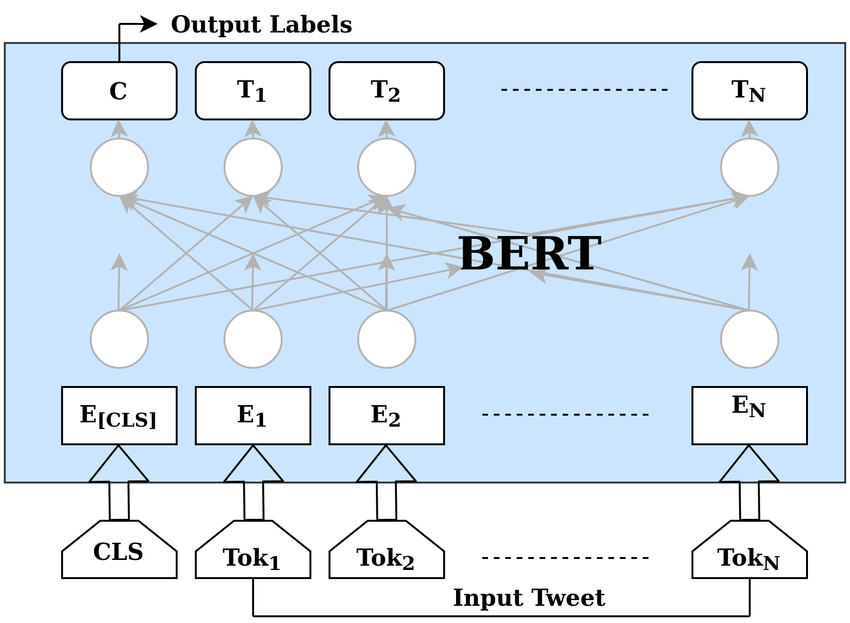

In [230]:
#!pip install sentence-transformers

In [225]:
# example
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')
query_embedding = model.encode('This framework generates embeddings for each input sentence')
passage_embedding = model.encode(['Sentences are passed as a list of string.',
                                  'The quick brown fox jumps over the lazy dog.'])
print("Similarity:", util.dot_score(query_embedding,passage_embedding))

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Similarity: tensor([[0.5381, 0.1181]])


In [227]:
tags = final_df['tags_cleaned'].to_list()

In [228]:
# Pre-Trained - https://www.sbert.net/
model = SentenceTransformer('all-MiniLM-L6-v2')
passege_embedding = model.encode(final_df['tags_cleaned'].to_list())
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(passege_embedding)

In [234]:
closest = cosine_similarity(model.encode(final_df['title'].to_list()))

In [235]:
final_df['title'].str.split(' ')

0                                               [Avatar]
1       [Pirates, of, the, Caribbean:, At, World's, End]
2                                              [Spectre]
3                             [The, Dark, Knight, Rises]
4                                         [John, Carter]
                              ...                       
4804                                      [El, Mariachi]
4805                                         [Newlyweds]
4806                       [Signed,, Sealed,, Delivered]
4807                                 [Shanghai, Calling]
4808                              [My, Date, with, Drew]
Name: title, Length: 4809, dtype: object

In [236]:
final_df['title'] = final_df['title'].str.lower()

In [237]:
def find_closest(text):
    spliter = final_df['title'].str.split(' ')
    i = 0
    for val in spliter:
        if text in val:
            print(final_df['title'][i])
            return i
        i+=1

In [238]:
def recommend_with_bert(movie):
    movie = movie.lower()
    titles = final_df['title']
    if movie in titles.to_list():
        index = final_df[final_df['title']==movie].index[0]
    else:
        index = find_closest(movie)
        
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x: x[1])
    for i in distances[1:10]:
        print(final_df.iloc[i[0]].title)

In [239]:
recommend_with_bert('Gandhi')

rang de basanti
gandhi, my father
a passage to india
namastey london
catch a fire
the wind that shakes the barley
dil jo bhi kahey...
ramanujan
lincoln


In [240]:
recommend_with_bert('Avatar')

serenity
star trek into darkness
after earth
battleship
aliens
rescue dawn
galaxina
event horizon
star trek beyond


In [241]:
recommend_with_bert('Superman')

superman returns
superman ii
superman iv: the quest for peace
superman iii
batman v superman: dawn of justice
batman & robin
suicide squad
the shadow
captain america: the winter soldier


In [242]:
pickle.dump(model, open('BERT_model.pkl','wb'))
pickle.dump(closest, open('similarity_BERT.pkl','wb'))

# Conclusion:

In [ ]:
 we have learned how to create a recommendation system using Cosine similarity and BOW and BERT model.
Apart from movie recommendations, we can try making recommender systems 
from shopping products, news, typing assistance etc